LAB6

In [2]:
# Import libraries
import numpy as np
from keras import layers
from keras.layers import Dense, Activation, LSTM, RepeatVector, TimeDistributed
from keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Create sinusoïdal function
x = np.arange(0, np.pi*2, 0.01)

y = np.sin(x)
y = (np.sin(x)+1)/2

x = np.expand_dims(x, -1)
y = np.expand_dims(y, -1)

In [4]:
# Create the model
model = Sequential()

In [5]:
# Add layers to the model
model.add(Dense(10, input_shape=(1,), activation='tanh'))
model.add(Dense(1, activation='tanh'))

In [6]:
# Groups layers into an object with training and inference features
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mean_squared_error'])

In [7]:
# Fit the model
model.fit(x, y, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
5/5 [==============================] - 4s 6ms/step - loss: 0.2283 - mean_squared_error: 0.2283
Epoch 2/20
5/5 [==============================] - 0s 4ms/step - loss: 0.2178 - mean_squared_error: 0.2178
Epoch 3/20
5/5 [==============================] - 0s 4ms/step - loss: 0.2084 - mean_squared_error: 0.2084
Epoch 4/20
5/5 [==============================] - 0s 4ms/step - loss: 0.1997 - mean_squared_error: 0.1997
Epoch 5/20
5/5 [==============================] - 0s 4ms/step - loss: 0.1915 - mean_squared_error: 0.1915
Epoch 6/20
5/5 [==============================] - 0s 4ms/step - loss: 0.1837 - mean_squared_error: 0.1837
Epoch 7/20
5/5 [==============================] - 0s 4ms/step - loss: 0.1764 - mean_squared_error: 0.1764
Epoch 8/20
5/5 [==============================] - 0s 4ms/step - loss: 0.1693 - mean_squared_error: 0.1693
Epoch 9/20
5/5 [==============================] - 0s 7ms/step - loss: 0.1625 - mean_squared_error: 0.1625
Epoch 10/20
5/5 [=============================

In [8]:
# Predict the model
predictions = model.predict(x)

20/20 [==============================] - 0s 2ms/step


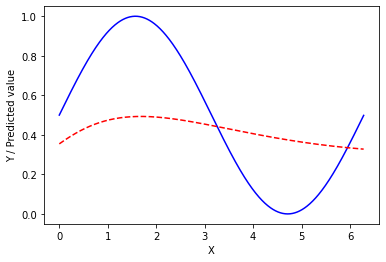

In [9]:
# Plot the figure
plt.plot(x, y, 'b', x, predictions, 'r--')
plt.xlabel('X')
plt.ylabel('Y / Predicted value')
plt.show()

In [10]:
# Download a zip file
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /tmp/cats_and_dogs_filtered.zip

--2023-03-20 08:30:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.2MB/s    in 4.1s    

2023-03-20 08:30:59 (16.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [11]:
# Extract downloaded zip file
local_zip = '/tmp/cats_and_dogs_filtered.zip'
print(os.listdir('/tmp'))
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

['pyright-1134-aFbEW1R3F3wx', 'cats_and_dogs_filtered.zip', '__autograph_generated_filezglamijj.py', 'pyright-844-UNoR0XKQwBcU', 'initgoogle_syslog_dir.0', 'pyright-1134-RJVPdPdaNVzG', '__autograph_generated_file2wjdvf4k.py', '__pycache__', 'kernel_manager_proxy.2e23eea38ee6.root.log.INFO.20230320-082609.20', 'python-languageserver-cancellation', 'kernel_manager_proxy.INFO', 'debugger_1y46nv30yt', 'dap_multiplexer.2e23eea38ee6.root.log.INFO.20230320-082613.85', 'pyright-844-M9fBpfo3YA8D', 'dap_multiplexer.INFO', '__autograph_generated_filejmteasyr.py']


In [12]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cats pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dogs pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cats pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dogs pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [13]:
# Import drive files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Train the model
train_cats_fnames = os.listdir(train_cats_dir)
print(train_cats_fnames[:10])

train_dogs_fnames = os.listdir(train_dogs_dir)
print(train_dogs_fnames[:10])

['cat.259.jpg', 'cat.101.jpg', 'cat.92.jpg', 'cat.594.jpg', 'cat.730.jpg', 'cat.355.jpg', 'cat.236.jpg', 'cat.836.jpg', 'cat.130.jpg', 'cat.752.jpg']
['dog.940.jpg', 'dog.515.jpg', 'dog.602.jpg', 'dog.232.jpg', 'dog.2.jpg', 'dog.482.jpg', 'dog.366.jpg', 'dog.483.jpg', 'dog.918.jpg', 'dog.728.jpg']


In [15]:
# Print
print('total training cat images')

total training cat images


In [16]:
%matplotlib inline

nrows = 4
ncols = 4

pic_index = 0

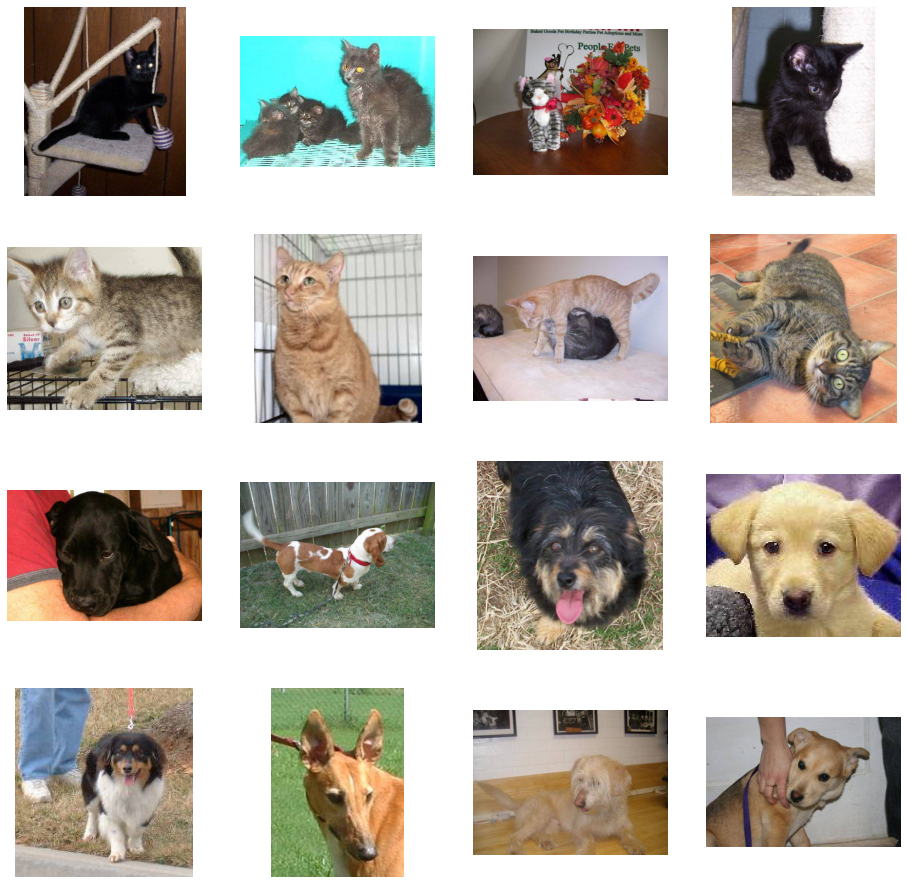

In [17]:
# Set up matplotlib fig, and size it to fit 4x4 pictures
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cats_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dogs_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [18]:
# Instantiate a keras tensor
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max_pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# First convolution extracts 32 filters that are 3x3
# Convolution is followed by max_pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# First convolution extracts 64 filters that are 3x3
# Convolution is followed by max_pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [19]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLu activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = 
model = Model(img_input, output)

In [20]:
# Print a summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

In [21]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])
# TODO

In [22]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen_generator
train_generator = train_datagen.flow_from_directory(
    train_dir,              # This is the source directory
    target_size=(150, 150), # All images will be resized by 150x150
    batch_size=20,
    class_mode='binary')    # Since we use binary_crossentropy, we need binary labels

# Flow validation images in batches of 20 using val_datagen_generator
validation_generator = val_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
# Fitting the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,   # 2000 images = batch_size * steps
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,    # 1000 images = batch_size * steps
    verbose=2
)

<ipython-input-24-912e5801fc6b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
100/100 - 19s - loss: 0.7364 - acc: 0.5430 - val_loss: 0.6373 - val_acc: 0.5920 - 19s/epoch - 191ms/step
Epoch 2/15
100/100 - 11s - loss: 0.6280 - acc: 0.6440 - val_loss: 0.6365 - val_acc: 0.6360 - 11s/epoch - 108ms/step
Epoch 3/15
100/100 - 8s - loss: 0.5765 - acc: 0.7010 - val_loss: 0.6380 - val_acc: 0.5850 - 8s/epoch - 83ms/step
Epoch 4/15
100/100 - 10s - loss: 0.5343 - acc: 0.7420 - val_loss: 0.5292 - val_acc: 0.7390 - 10s/epoch - 99ms/step
Epoch 5/15
100/100 - 10s - loss: 0.4908 - acc: 0.7575 - val_loss: 0.6022 - val_acc: 0.7160 - 10s/epoch - 98ms/step
Epoch 6/15
100/100 - 8s - loss: 0.4414 - acc: 0.8055 - val_loss: 0.5530 - val_acc: 0.7200 - 8s/epoch - 84ms/step
Epoch 7/15
100/100 - 10s - loss: 0.3843 - acc: 0.8215 - val_loss: 0.5399 - val_acc: 0.7470 - 10s/epoch - 99ms/step
Epoch 8/15
100/100 - 10s - loss: 0.3029 - acc: 0.8655 - val_loss: 0.5818 - val_acc: 0.7500 - 10s/epoch - 99ms/step
Epoch 9/15
100/100 - 8s - loss: 0.2161 - acc: 0.9145 - val_loss: 0.6681 - val_acc:

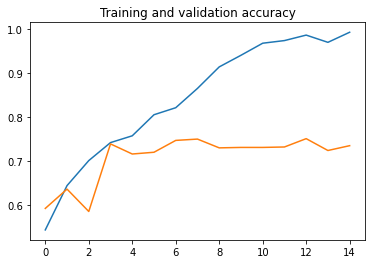

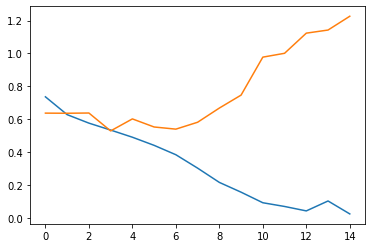

In [25]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epochs
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epochs
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation accuracy per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)